<a href="https://colab.research.google.com/github/EnterTheBeginning/Machine-Learning/blob/master/HW1_Problem4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libaries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Importing dataset


In [0]:
from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


##Normalize the data and Flattening

In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
train_images.shape

(60000, 784)

In [0]:
test_images.shape

(10000, 784)

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

##Keras 

In [0]:
from keras import layers, models

In [0]:
network = models.Sequential()

In [0]:
network.add(layers.Dense(10,input_shape=(784,),activation='softmax'))

In [0]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [0]:
network.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.6027 - acc: 0.8490
Epoch 2/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.3310 - acc: 0.9084
Epoch 3/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.3021 - acc: 0.9164
Epoch 4/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.2888 - acc: 0.9191
Epoch 5/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.2806 - acc: 0.9221
Epoch 6/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.2747 - acc: 0.9234
Epoch 7/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.2706 - acc: 0.9252
Epoch 8/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.2677 - acc: 0.9256
Epoch 9/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.2648 - acc: 0.9267
Epoch 10/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.2627 - acc: 0.9275

Model loss and accuracy:

In [0]:
network.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 25us/step


[0.2685386507928371, 0.9266]

In [0]:
plot_model(network, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

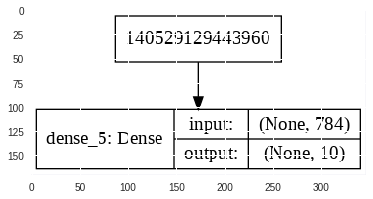

In [0]:
img=mpimg.imread('model_plot.png')
imgplot = plt.imshow(img)
plt.show()
